In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# 클러스터링

In [3]:
df = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/df.csv')
lp_data21 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/living_pop2021.csv', encoding = 'cp949')
lp_data22 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/living_pop2022.csv', encoding = 'utf-8')

In [4]:
df.drop(df.iloc[:,:1], axis = 1, inplace = True)
lp_data21.drop(lp_data21.iloc[:,:1], axis = 1, inplace = True)

In [5]:
lp_data21['21생활인구평균'] = lp_data21.iloc[:,1:].mean(axis=1)
lp_data22['22생활인구평균'] = lp_data22.iloc[:,1:].mean(axis=1)

In [6]:
lp21 = lp_data21[['행정구역','21생활인구평균']]
lp22 = lp_data22[['행정구역','22생활인구평균']]

In [7]:
df = pd.merge(df,lp21,how='inner',on='행정구역')
df = pd.merge(df,lp22,how='inner',on='행정구역')

C:\Users\admin\AppData\Local\Temp\ipykernel_19816\172236441.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

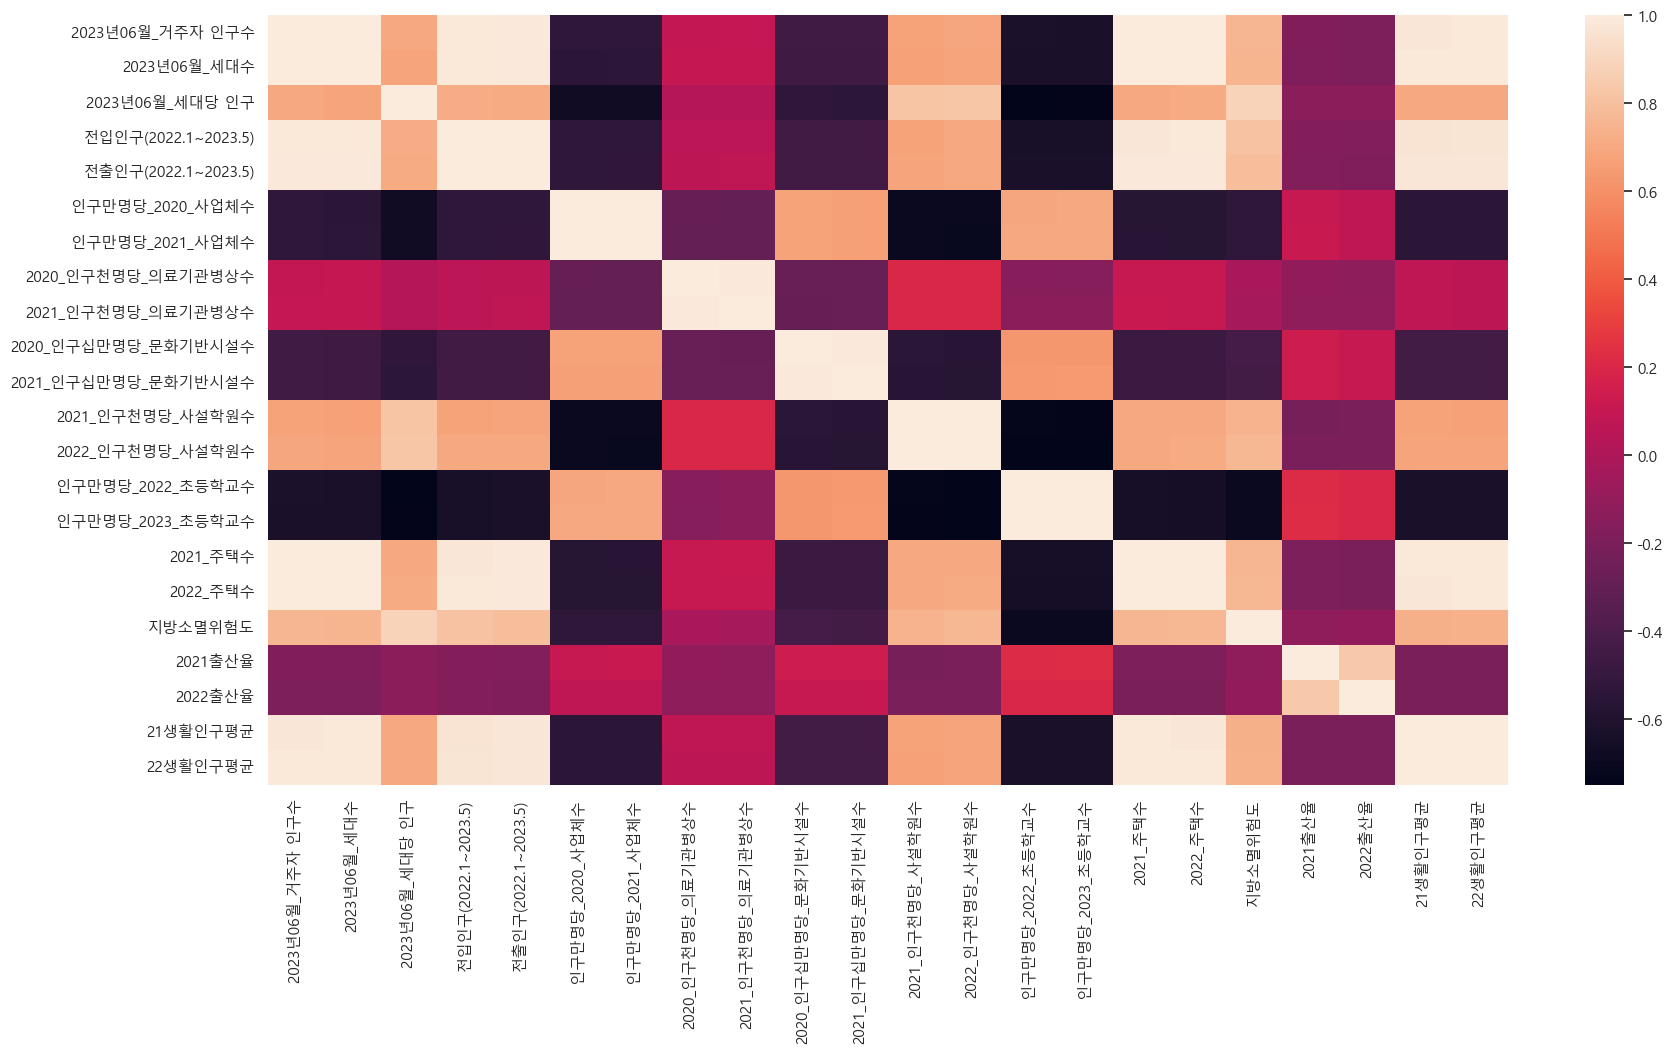

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


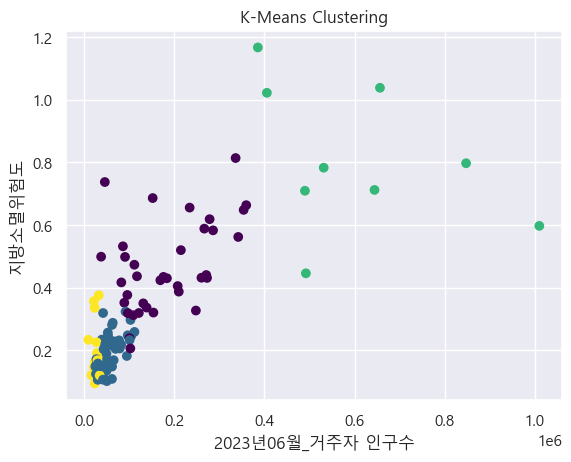

In [10]:
numeric_df = df.iloc[:, 1:]

# 데이터 정규화 (Standardization)
scaler = StandardScaler()
normalized_df = scaler.fit_transform(numeric_df)

# K-Means 클러스터링 모델 생성 및 학습
n_clusters = 4  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(normalized_df)

# 클러스터 레이블 가져오기
cluster_labels = kmeans.labels_

# 클러스터링 결과 시각화
df['Cluster'] = cluster_labels  # 클러스터 레이블을 데이터프레임에 추가

plt.scatter(df['2023년06월_거주자 인구수'], df['지방소멸위험도'], c=df['Cluster'], cmap='viridis')
plt.xlabel('2023년06월_거주자 인구수')
plt.ylabel('지방소멸위험도')
plt.title('K-Means Clustering')
plt.show()

# PCA하고 해보자

In [204]:
from sklearn.decomposition import PCA

In [214]:
df = pd.read_csv('C:/Users/user/Desktop/데분/df.csv')

In [215]:
# 숫자열에 대해 콤마 제거 및 정수로 변환
columns_to_process = df.columns[1:3]  # 첫 번째 열,두번째열

for column in columns_to_process:
    df[column] = df[column].apply(lambda x: int(str(x).replace(',', '')))

df.fillna(0, inplace = True) #고성과 양양 병원급 X

In [216]:
x = df['2023년06월_거주자 인구수']

df['2020_사업체수'] = df['2020_사업체수'] * 10000/x
df['2021_사업체수'] = df['2021_사업체수'] * 10000/x
df['2022_초등학교수'] = df['2022_초등학교수'] * 10000/x
df['2023_초등학교수'] = df['2023_초등학교수'] * 10000/x

df.rename(columns = {'2020_사업체수':'인구만명당_2020_사업체수',
                     '2021_사업체수':'인구만명당_2021_사업체수',
                     '2022_초등학교수':'인구만명당_2022_초등학교수',
                     '2023_초등학교수':'인구만명당_2023_초등학교수'}, inplace = True)

In [217]:
pca = PCA(n_components=3) #분산설명량 체크하면서 바꿈

In [218]:
#정규화
numeric_df = df.iloc[:, 1:]
scaler = StandardScaler()
normalized_df = scaler.fit_transform(numeric_df)

In [219]:
# 데이터를 PCA 모델에 적합 (주성분 찾기)
pca.fit(normalized_df)

# 데이터를 주성분으로 변환
transformed_df = pca.transform(normalized_df)

In [220]:
# 설명가능한 분산량 (explained variance) 출력
explained_variance = pca.explained_variance_ratio_
print("설명가능한 분산량:", explained_variance)

설명가능한 분산량: [0.58093951 0.12670117 0.0917585 ]


In [221]:
# K-Means 클러스터링 모델 생성 및 학습
n_clusters = 4  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(transformed_df)


KMeans(n_clusters=4, random_state=42)

In [222]:
# 클러스터 레이블 가져오기
cluster_labels = kmeans.labels_

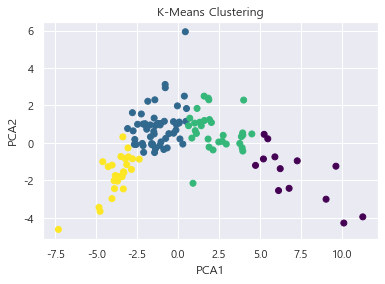

In [223]:
# 원래 데이터와 클러스터 중심을 그래프로 그리기
plt.scatter(transformed_df[:, 0], transformed_df[:, 1], c=cluster_labels, cmap = 'viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering')
plt.show()

In [224]:
df['cluster'] = cluster_labels

In [225]:
#군집별 데이터 확인
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]

In [226]:
df0

,행정구역,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
0,세종특별자치시,385346,160033,2.41,91936,80012,2.078651,2.127958,5.6,5.6,...,2.2,2.4,1.349437,1.375387,143798,150278,1.166472,1.28,1.12,0
2,원주시,359513,168985,2.13,72688,68342,3.218242,3.326723,13.6,15.0,...,1.7,1.8,1.418586,1.418586,143538,146861,0.663052,0.94,0.94,0
19,청주시,847776,394682,2.15,151803,148974,1.278640,1.269203,12.6,12.6,...,1.7,1.8,1.108783,1.108783,308987,314788,0.796848,0.94,0.86,0
30,천안시,656537,304443,2.16,127244,127690,1.696782,1.725721,14.3,15.0,...,1.9,2.1,1.172820,1.203283,245351,248378,1.037687,0.94,0.84,0
33,아산시,335956,153429,2.19,70788,57937,3.241496,3.187917,10.7,10.5,...,1.3,1.3,1.398993,1.428759,130041,136936,0.813483,0.90,0.91,0
45,전주시,644410,295290,2.18,112148,120639,1.800096,1.800096,26.0,25.6,...,3.1,3.2,1.163855,1.163855,243306,246860,0.711710,0.79,0.73,0
81,포항시,492044,231749,2.12,67287,74911,2.367674,2.398160,19.6,19.8,...,1.5,1.6,1.341343,1.341343,201687,202515,0.445577,0.88,0.89,0
85,구미시,405408,185423,2.19,61682,67359,2.772516,2.804582,9.3,9.2,...,2.0,2.1,1.282658,1.282658,152482,152734,1.021711,0.87,0.82,0
104,창원시,1010470,453547,2.23,141002,155146,1.093551,1.101468,19.9,20.1,...,1.9,2.0,1.108395,1.108395,368075,367588,0.596969,0.89,0.82,0
105,진주시,341743,159298,2.15,53523,56564,3.435330,3.479223,19.3,19.1,...,2.5,2.6,1.346041,1.346041,131224,131902,0.561610,0.91,0.94,0


In [227]:
df0.describe()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
count,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,5.272704e+05,239568.923077,2.207692,89404.538462,90213.923077,2.424935,2.449858,15.561538,15.746154,5.838462,...,1.953846,2.069231,1.256781,1.265585,198082.846154,200963.153846,0.765756,0.936923,0.881538,0.0
std,2.108595e+05,96869.298766,0.082073,33477.016787,35650.274535,0.796989,0.803148,6.103897,6.049327,2.796587,...,0.461186,0.481983,0.122449,0.123568,74637.463441,74239.473048,0.205507,0.113165,0.093617,0.0
min,3.359560e+05,153429.000000,2.120000,51142.000000,51124.000000,1.093551,1.101468,5.600000,5.600000,3.100000,...,1.300000,1.300000,1.108395,1.108395,130041.000000,131902.000000,0.445577,0.790000,0.730000,0.0
25%,3.595130e+05,160033.000000,2.150000,67287.000000,67359.000000,1.800096,1.800096,10.700000,10.500000,4.300000,...,1.700000,1.800000,1.130585,1.158850,143538.000000,146861.000000,0.647988,0.890000,0.820000,0.0
50%,4.899260e+05,221969.000000,2.190000,72688.000000,75815.000000,2.367674,2.398160,14.300000,15.000000,5.900000,...,1.900000,2.000000,1.282658,1.282658,175552.000000,177771.000000,0.711710,0.910000,0.860000,0.0
75%,6.444100e+05,295290.000000,2.230000,112148.000000,120639.000000,3.218242,3.187917,19.900000,20.100000,6.100000,...,2.100000,2.300000,1.349437,1.375387,243306.000000,246860.000000,0.813483,0.940000,0.930000,0.0
max,1.010470e+06,453547.000000,2.410000,151803.000000,155146.000000,3.435330,3.479223,26.000000,25.600000,14.400000,...,3.100000,3.200000,1.418586,1.428759,368075.000000,367588.000000,1.166472,1.280000,1.120000,0.0


In [228]:
df1.describe()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,55720.833333,29875.037037,1.853519,7703.407407,7556.777778,26.415846,28.078108,18.451852,18.724074,15.314815,...,0.933333,0.948148,3.215858,3.192851,26543.148148,26776.407407,0.193555,1.010926,0.965185,1.0
std,21622.330542,10978.828614,0.083353,3876.389282,3764.416052,9.255881,9.897295,11.303794,11.396407,4.350121,...,0.299055,0.298891,0.728553,0.703319,9600.846037,9678.683652,0.071268,0.227623,0.215229,0.0
min,24418.000000,13400.000000,1.700000,3373.000000,3204.000000,12.339022,13.129870,4.100000,4.200000,6.000000,...,0.300000,0.300000,1.074345,1.074345,11948.000000,12046.000000,0.101479,0.540000,0.540000,1.0
25%,41429.500000,22861.500000,1.790000,5163.250000,5037.500000,19.300850,20.474109,10.750000,10.350000,12.675000,...,0.800000,0.725000,2.783475,2.783475,19479.500000,19638.000000,0.147783,0.870000,0.840000,1.0
50%,49850.000000,27078.000000,1.860000,6452.500000,6435.500000,25.624572,26.935140,17.800000,18.350000,14.550000,...,0.900000,0.900000,3.084976,3.084976,24388.000000,24492.000000,0.171429,0.955000,0.945000,1.0
75%,62723.500000,34327.500000,1.920000,8080.000000,8207.000000,32.154016,34.047362,22.675000,22.300000,17.675000,...,1.100000,1.100000,3.770737,3.609598,30436.750000,30845.250000,0.231362,1.137500,1.047500,1.0
max,111273.000000,57811.000000,2.030000,18174.000000,17125.000000,50.372676,52.461299,68.200000,67.500000,27.200000,...,1.700000,1.700000,5.048152,4.659832,48915.000000,48963.000000,0.498547,1.870000,1.800000,1.0


In [229]:
df2.describe()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,164307.387097,79215.838710,2.068387,27636.290323,27670.838710,8.999402,9.270435,16.722581,16.696774,9.951613,...,1.564516,1.651613,1.817848,1.821157,70338.806452,71260.516129,0.438008,0.966129,0.929355,2.0
std,72282.544467,33564.125915,0.102570,12783.286031,13194.963135,4.068096,4.183335,7.785787,7.883632,5.693146,...,0.328175,0.328503,0.368426,0.368519,29585.298468,30032.883304,0.128118,0.133033,0.119804,0.0
min,45479.000000,18716.000000,1.910000,13270.000000,12096.000000,3.861152,3.814117,2.900000,3.000000,5.000000,...,0.900000,1.000000,1.099409,1.099409,17156.000000,18660.000000,0.205883,0.700000,0.720000,2.0
25%,101205.000000,52349.500000,2.000000,16035.000000,15333.000000,5.622421,5.771214,11.700000,11.550000,7.200000,...,1.350000,1.400000,1.651329,1.651329,43723.000000,43746.000000,0.342902,0.895000,0.870000,2.0
50%,151796.000000,69202.000000,2.060000,22538.000000,21794.000000,8.023927,8.307202,16.300000,16.000000,8.600000,...,1.500000,1.600000,1.751089,1.757228,64442.000000,66448.000000,0.429785,0.960000,0.910000,2.0
75%,224136.500000,103484.000000,2.105000,36883.000000,38123.500000,12.578184,13.061721,19.950000,19.900000,10.650000,...,1.800000,1.800000,2.004606,2.004606,97980.000000,98613.500000,0.508728,1.045000,0.995000,2.0
max,285858.000000,134480.000000,2.430000,59062.000000,55241.000000,16.513116,17.146476,34.800000,34.600000,35.100000,...,2.300000,2.500000,3.038590,3.038590,118515.000000,119129.000000,0.736941,1.230000,1.210000,2.0


In [230]:
df3.describe()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2021_인구천명당_사설학원수,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,cluster
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.00000,26.000000,26.0
mean,28346.307692,15744.846154,1.798846,3853.846154,3738.461538,53.588076,57.448443,6.919231,6.946154,30.634615,...,0.573077,0.565385,4.302689,4.302689,13592.807692,13656.961538,0.179399,1.11000,1.030769,3.0
std,7851.734380,4355.646071,0.077062,1085.982677,1069.991934,26.159684,28.144577,5.554243,5.847887,13.250870,...,0.206993,0.201876,0.772776,0.772776,4185.269368,4221.888236,0.073020,0.28195,0.264891,0.0
min,9043.000000,5519.000000,1.640000,1644.000000,1691.000000,27.021856,28.510077,0.000000,0.000000,12.700000,...,0.100000,0.100000,2.984481,2.984481,3025.000000,3016.000000,0.094006,0.80000,0.640000,3.0
25%,23541.750000,13581.250000,1.752500,3122.500000,3022.750000,40.502948,43.885882,2.550000,2.950000,24.150000,...,0.400000,0.425000,3.791515,3.791515,11067.500000,11094.500000,0.144085,0.87250,0.835000,3.0
50%,27687.000000,15232.000000,1.785000,3942.000000,3726.500000,50.356120,54.333561,6.550000,6.450000,28.550000,...,0.600000,0.550000,4.353350,4.353350,13477.000000,13583.000000,0.162564,1.05000,0.990000,3.0
75%,32679.250000,18065.250000,1.830000,4707.750000,4480.250000,58.339110,62.099987,9.050000,8.450000,31.950000,...,0.775000,0.700000,4.696429,4.696429,16234.000000,16258.000000,0.182176,1.29250,1.205000,3.0
max,47036.000000,25640.000000,2.000000,5917.000000,5855.000000,170.408050,183.346235,23.800000,26.600000,72.400000,...,0.900000,0.900000,5.726502,5.726502,22098.000000,22390.000000,0.375498,1.80000,1.560000,3.0


In [233]:
#0>2>1>3

df0.to_csv('C:/Users/user/Desktop/데분/소도시.csv', index=False, encoding='cp949')
df1.to_csv('C:/Users/user/Desktop/데분/좆좆소도시.csv',index=False, encoding='cp949')
df2.to_csv('C:/Users/user/Desktop/데분/좆소도시.csv',index=False, encoding='cp949')
df3.to_csv('C:/Users/user/Desktop/데분/좆좆좆소도시.csv',index=False, encoding='cp949')

# 생활인구 클러스터링

In [157]:
mz = pd.read_csv('C:/Users/user/Desktop/데분/202306_202306_연령별인구현황_월간.csv', encoding = 'cp949')

In [158]:
mz['행정구역'] = mz['행정구역'].str.replace(r'\s*\([^)]*\)', '', regex=True)
mz['행정구역'] = mz['행정구역'].str.split().str.get(-1)

In [159]:
mz.loc[mz['행정구역'] == '고성군', '행정구역'] = ['고성군(강원)', '고성군(경남)']

In [161]:
mz['2023년06월_계_20~29세'] = mz['2023년06월_계_20~29세'].apply(lambda x: int(str(x).replace(',', '')))
mz['2023년06월_계_30~39세'] = mz['2023년06월_계_30~39세'].apply(lambda x: int(str(x).replace(',', '')))

In [162]:
mz['MZ'] = mz['2023년06월_계_20~29세'] + mz['2023년06월_계_30~39세']
mz = mz[['행정구역','MZ']]

In [164]:
df = pd.merge(df,mz,how='inner',on = '행정구역')

In [165]:
df.columns

Index(['행정구역', '2023년06월_거주자 인구수', '2023년06월_세대수', '2023년06월_세대당 인구',
       '전입인구(2022.1~2023.5)', '전출인구(2022.1~2023.5)', '인구만명당_2020_사업체수',
       '인구만명당_2021_사업체수', '2020_인구천명당_의료기관병상수', '2021_인구천명당_의료기관병상수',
       '2020_인구십만명당_문화기반시설수', '2021_인구십만명당_문화기반시설수', '2021_인구천명당_사설학원수',
       '2022_인구천명당_사설학원수', '인구만명당_2022_초등학교수', '인구만명당_2023_초등학교수', '2021_주택수',
       '2022_주택수', '지방소멸위험도', '2021출산율', '2022출산율', '21생활인구평균', '22생활인구평균',
       '사업체수_대비_생활인구', 'MZ'],
      dtype='object')

In [218]:
df['사업체수_대비_생활인구'] = df['21생활인구평균']/df['인구만명당_2021_사업체수']
df['인구수_대비_생활인구'] = df['22생활인구평균']/df['2023년06월_거주자 인구수']

In [16]:
lp_df = df[['행정구역','2023년06월_거주자 인구수','전입인구(2022.1~2023.5)','전출인구(2022.1~2023.5)', '22생활인구평균']]

In [17]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

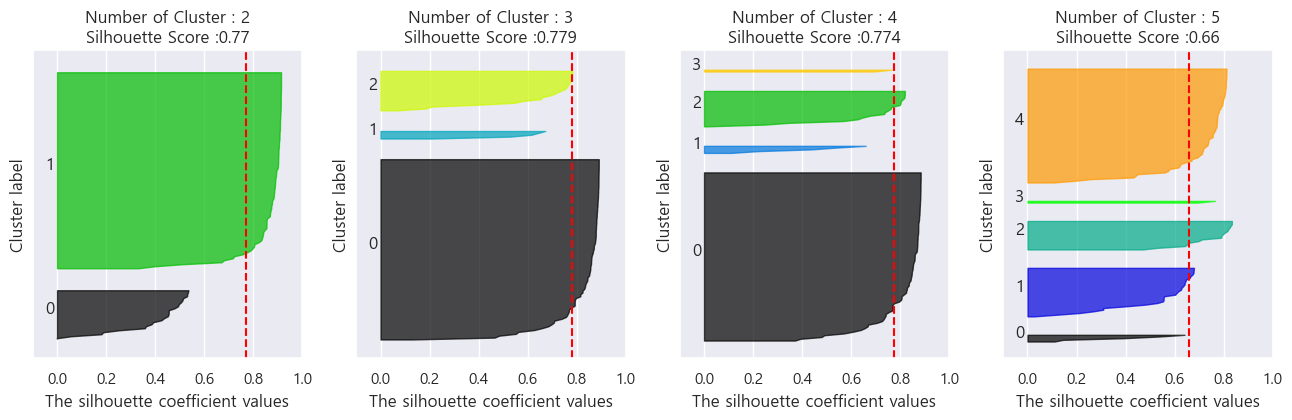

In [21]:
visualize_silhouette([ 2, 3, 4, 5], lp_df.iloc[:,1:])

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Local\Temp\ipykernel_19816\3209310963.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp_df['클러스터'] = cluster_labels  # 클러스터 레이블을 데이터프레임에 추가


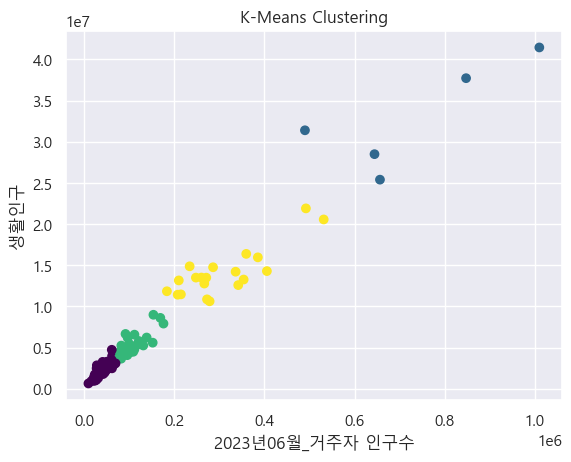

In [34]:
numeric_df = lp_df.iloc[:, 1:]

# 데이터 정규화 (Standardization)
scaler = StandardScaler()
normalized_df = scaler.fit_transform(numeric_df)

# K-Means 클러스터링 모델 생성 및 학습
n_clusters = 4  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(normalized_df)

# 클러스터 레이블 가져오기
cluster_labels = kmeans.labels_

# 클러스터링 결과 시각화
lp_df['클러스터'] = cluster_labels  # 클러스터 레이블을 데이터프레임에 추가

plt.scatter(lp_df['2023년06월_거주자 인구수'], lp_df['22생활인구평균'], c=lp_df['클러스터'], cmap='viridis')
plt.xlabel('2023년06월_거주자 인구수')
plt.ylabel('생활인구')
plt.title('K-Means Clustering')
plt.show()

In [35]:
lp_df0 = lp_df[lp_df['클러스터'] == 0]
lp_df1 = lp_df[lp_df['클러스터'] == 1]
lp_df2 = lp_df[lp_df['클러스터'] == 2]
lp_df3 = lp_df[lp_df['클러스터'] == 3]

In [40]:
lp_df.to_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/lp_df.csv', index = False)

In [41]:
lp_df0

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),22생활인구평균,클러스터
5,태백시,38802,5139,6335,2.555405e+06,0
7,삼척시,63115,11049,10431,3.565266e+06,0
8,홍천군,67448,9440,9327,4.075700e+06,0
9,횡성군,46439,6365,5504,2.649234e+06,0
10,영월군,37425,4912,4568,1.861083e+06,0
...,...,...,...,...,...,...
117,하동군,41959,4851,5237,1.787245e+06,0
118,산청군,34025,4638,4010,1.685689e+06,0
119,함양군,37172,4227,4338,2.047514e+06,0
120,거창군,60198,6920,6720,2.706173e+06,0


In [116]:
lp_df4 = lp_df[lp_df['클러스터'] == 4]

In [118]:
lp_df4['인구수_대비_생활인구'] = lp_df4['22생활인구평균']/lp_df4['2023년06월_거주자 인구수']

<ipython-input-118-fa5e35761e28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp_df4['인구수_대비_생활인구'] = lp_df4['22생활인구평균']/lp_df4['2023년06월_거주자 인구수']


In [131]:
lp_df4.to_csv('C:/Users/user/Desktop/데분/lp_df4.csv', encoding = 'utf-8', index = False)

In [133]:
lp_df4 = pd.read_csv('C:/Users/user/Desktop/데분/lp_df4.csv', encoding = 'cp949')

In [200]:
mz

,행정구역,MZ
0,세종특별자치시,98264
1,춘천시,71686
2,원주시,88308
3,강릉시,43645
4,동해시,16959
...,...,...
119,함양군,4669
120,거창군,9749
121,합천군,4533
122,제주시,118410


In [199]:
lp_df4

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),22생활인구평균,클러스터,인구수_대비_생활인구,관광 활성화 지수
0,태백시,38802,5139,6335,2555405.325,4,65.857567,16.6
1,삼척시,63115,11049,10431,3565265.747,4,56.488406,42.2
2,홍천군,67448,9440,9327,4075700.482,4,60.427299,62.3
3,횡성군,46439,6365,5504,2649233.625,4,57.047603,32.9
4,영월군,37425,4912,4568,1861082.523,4,49.728324,29.3
...,...,...,...,...,...,...,...,...
66,하동군,41959,4851,5237,1787245.254,4,42.595039,21.2
67,산청군,34025,4638,4010,1685688.525,4,49.542646,29.4
68,함양군,37172,4227,4338,2047514.484,4,55.082172,18.3
69,거창군,60198,6920,6720,2706173.278,4,44.954538,20.0


In [201]:
mzdf = pd.merge(lp_df4,mz,how='inner',on='행정구역')

In [203]:
mzdf['MZ비율'] = mzdf['MZ']/mzdf['2023년06월_거주자 인구수']

In [206]:
mzdf.sort_values(by = 'MZ비율').tail(20)

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),22생활인구평균,클러스터,인구수_대비_생활인구,관광 활성화 지수,MZ,MZ비율
12,양양군,27736,4742,4335,2.840636e+06,4,102.416927,58.8,4283,0.154420
0,태백시,38802,5139,6335,2.555405e+06,4,65.857567,16.6,6000,0.154631
44,장성군,42722,7235,6949,2.149953e+06,4,50.324269,18.9,6870,0.160807
32,담양군,45494,6634,6467,2.469150e+06,4,54.274183,31.0,7324,0.160988
69,거창군,60198,6920,6720,2.706173e+06,4,44.954538,20.0,9749,0.161949
57,예천군,55571,8137,7384,2.957613e+06,4,53.222235,15.3,9017,0.162261
59,울진군,46718,6055,6404,2.953581e+06,4,63.221486,29.6,7715,0.165140
41,영암군,52550,7909,7359,3.049065e+06,4,58.022168,18.9,8798,0.167422
2,홍천군,67448,9440,9327,4.075700e+06,4,60.427299,62.3,11446,0.169701
43,영광군,52172,7477,6554,2.457072e+06,4,47.095616,17.7,9137,0.175132


In [146]:
lp_df4.sort_values(by = '관광 활성화 지수').head(20)

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),22생활인구평균,클러스터,인구수_대비_생활인구,관광 활성화 지수
52,영양군,15829,1644,1691,9.339158e+05,4,59.000302,11.3
60,울릉군,9043,2386,2071,6.391271e+05,4,70.676449,11.8
19,계룡시,45479,14352,12096,1.988998e+06,4,43.734432,12.1
9,양구군,21283,3114,3405,1.395209e+06,4,65.555083,12.3
16,증평군,37232,6008,4959,1.966646e+06,4,52.821403,12.9
61,의령군,25752,3373,3204,1.378013e+06,4,53.510924,13.2
27,장수군,21083,2195,2362,9.538963e+05,4,45.244808,13.2
23,청양군,30154,4138,3710,1.784128e+06,4,59.167198,13.8
55,고령군,30156,3990,3766,1.519587e+06,4,50.390851,14.2
29,순창군,26802,4014,3460,1.104545e+06,4,41.211287,14.2


In [139]:
lp_df4[lp_df4['관광 활성화 지수'] > 44.6] #전국평균44.6

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),22생활인구평균,클러스터,인구수_대비_생활인구,관광 활성화 지수
2,홍천군,67448,9440,9327,4075700.482,4,60.427299,62.3
5,평창군,40595,5498,5079,3258379.461,4,80.265537,63.1
11,고성군(강원),27238,4731,4376,2469073.218,4,90.648110,56.1
12,양양군,27736,4742,4335,2840635.873,4,102.416927,58.8
24,태안군,60908,7841,7368,4727313.143,4,77.613994,64.4


In [143]:
lp_df4[(lp_df4['관광 활성화 지수'] > 23) & (lp_df4['관광 활성화 지수'] < 46)]

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),22생활인구평균,클러스터,인구수_대비_생활인구,관광 활성화 지수
1,삼척시,63115,11049,10431,3565265.747,4,56.488406,42.2
3,횡성군,46439,6365,5504,2649233.625,4,57.047603,32.9
4,영월군,37425,4912,4568,1861082.523,4,49.728324,29.3
6,정선군,34511,4087,4515,2416657.199,4,70.025708,38.6
10,인제군,32047,5917,5855,2303521.953,4,71.879488,24.9
17,괴산군,36661,5381,5965,2059527.280,4,56.177608,27.6
18,단양군,27638,3148,3220,1746267.956,4,63.183586,27.1
31,부안군,49605,6304,6266,2756593.971,4,55.570889,33.8
32,담양군,45494,6634,6467,2469149.667,4,54.274183,31.0
37,화순군,61467,7563,7530,3270463.313,4,53.206815,25.7


In [102]:
nlp_df = pd.read_csv('C:/Users/user/Desktop/데분/cluster.csv', encoding = 'utf-8')
nlp_df1 = pd.read_csv('C:/Users/user/Desktop/데분/cluster1.csv', encoding = 'utf-8')

In [103]:
nlp_df

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),Cluster
0,동해시,88723,13779,13980,0
1,태백시,38802,5139,6335,0
2,속초시,82116,16867,16580,0
3,삼척시,63115,11049,10431,0
4,홍천군,67448,9440,9327,0
...,...,...,...,...,...
92,하동군,41959,4851,5237,0
93,산청군,34025,4638,4010,0
94,함양군,37172,4227,4338,0
95,거창군,60198,6920,6720,0


In [178]:
differences2 = pd.concat([lp_df0["행정구역"], lp_df4['행정구역']]).drop_duplicates(keep=False)

In [104]:
differences = pd.concat([lp_df0["행정구역"], nlp_df['행정구역']]).drop_duplicates(keep=False)

In [105]:
differences

66    안동시
Name: 행정구역, dtype: object